# カリフォルニアの住宅価格（相関関係の可視化）

1.   リスト項目
2.   リスト項目



#### 'data'～特徴量データセット
説明変数|意味|日本語
-|-|-
MedInc|median income in block|収入の中央値
HouseAge|median house age in block|ブロック内の家の中央年齢
AveRooms|average number of rooms|平均部屋数
AveBedrms|average number of bedrooms|ベッドルームの平均数
Population|block population|ブロック人口
AveOccup|average house occupancy|平均住宅占有率
Latitude|house block latitude|家屋の緯度
Longitude|house block longitude|ハウスブロックの経度

#### 'target'～カリフォルニアの住宅価格
　単位は10万ドル

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import pandas as pd 
import numpy as np

# california_housingデータセットを読み込む
housing = fetch_california_housing()

columns = housing.feature_names
index = np.arange(1,len(housing.data) + 1)

df = pd.DataFrame(housing.data, columns=columns, index=index)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
2,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
3,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
4,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
5,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20636,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20638,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20639,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# 目的変数をマージする
df['Price'] = housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
3,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
4,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
5,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20636,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20638,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20639,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# データに欠損値が含まれていないか確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 1 to 20640
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [ ]:
# 各属性の統計値を確認する
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


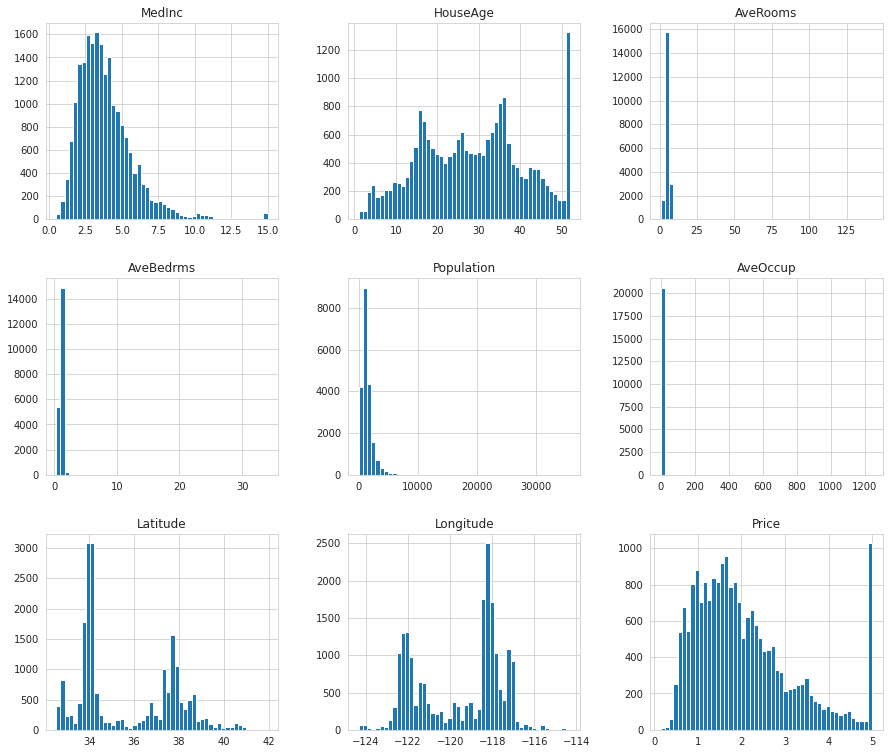

In [ ]:
# どのように分布されているかヒストグラムで可視化してみる
df.hist(bins=50, figsize=(15, 13))
plt.show()

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Figure size 1440x1080 with 0 Axes>

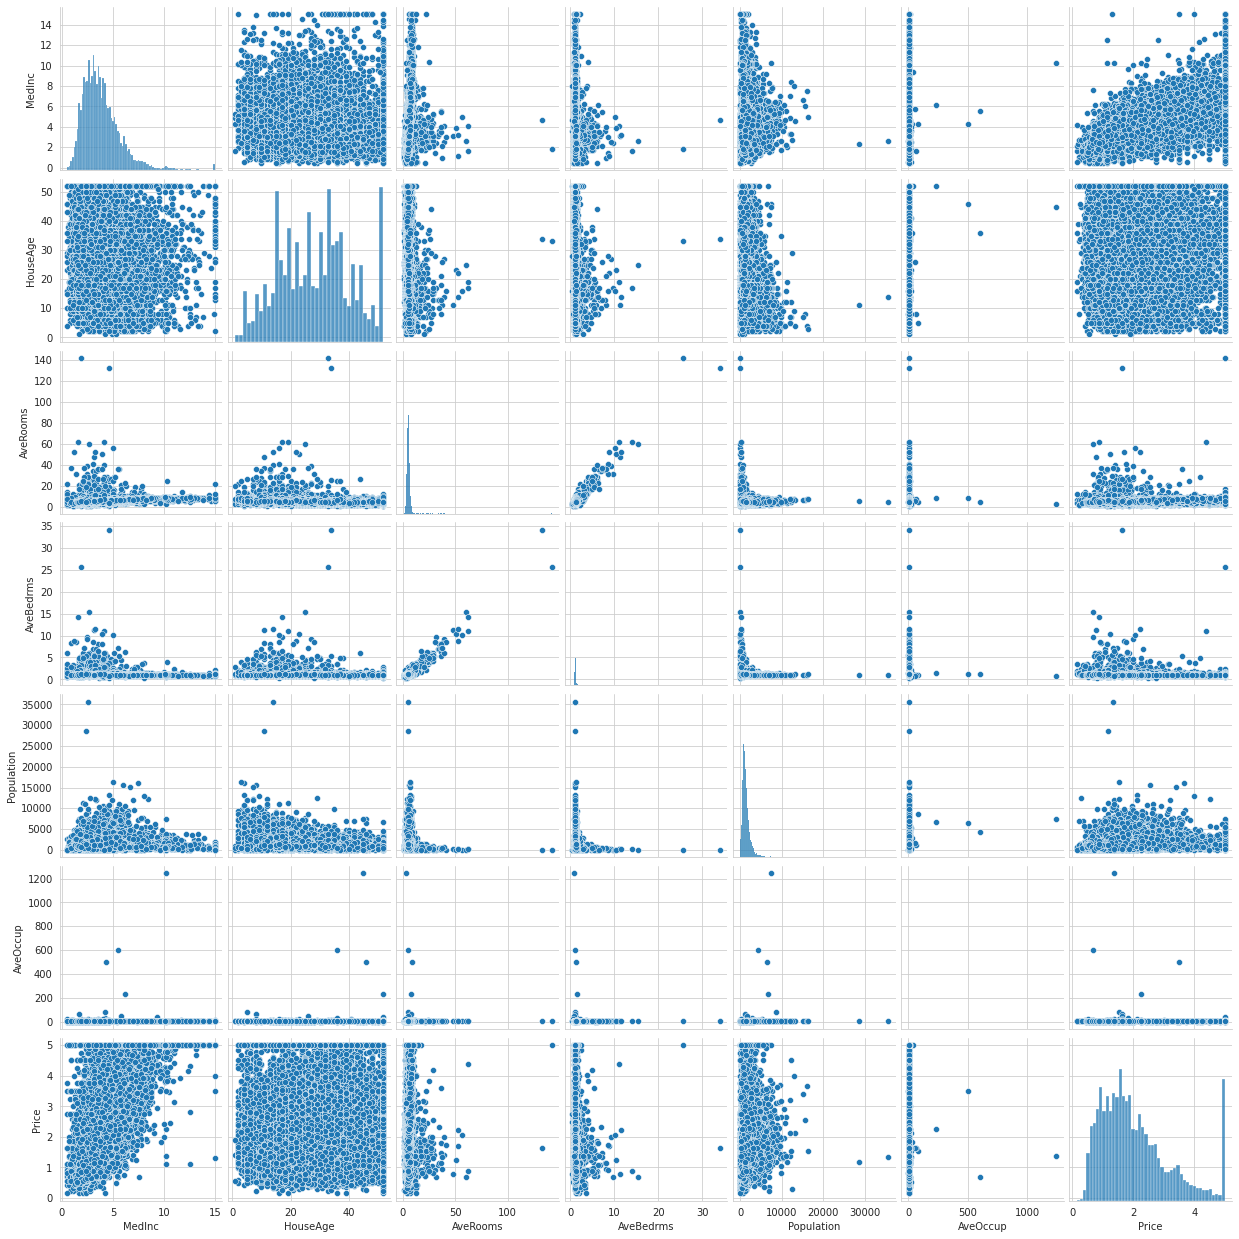

In [ ]:
plt.figure(figsize=(20, 15))
sns.set_style('whitegrid')
sns.pairplot(df.drop(['Latitude', 'Longitude'], axis=1))
plt.show()

In [ ]:
# 説明変数と目的変数へ分割
X = df.drop(['Price'], axis=1)
y = df['Price']

In [ ]:
 # 標準化（平均0, 分散1）する
scaler = StandardScaler()
 # データに合わせて計算しスケーリングする
X = scaler.fit_transform(X)

In [ ]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# 線形回帰をインスタンス化する
lr = LinearRegression()

In [ ]:
# 学習
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# テストデータセットを予測
y_pred = lr.predict(X_test)

In [ ]:
# 予測がどのくらい正しかったのかを評価(二乗平均平方根誤差 (RMSE))
accuracy = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
accuracy

0.7197380534040614